### Implementation of Q learning for episodic win or loose secenarions 

### IDEAS
The way this works is that after
 each game the values of the function Q 
 are shown to a neural network, this values are 
 determined by the previous games and it includes 
 the discount factor. It applies the Bellman ecuation 
 with a discount factor defined by the length of the game.

In [1]:
from VisualModule import AgentEnvironment
from DQN_Agent import NeurosmashAgent

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

import gym
import math
import random
from collections import namedtuple
from itertools import count
from PIL import Image
import os

from stopwatch import Stopwatch


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_output_dir = "output/model_output/"

if not os.path.exists(model_output_dir):
    os.makedirs(model_output_dir)

max_distance = 600
show_images = False
skip_frames = 15
state_size =  13 # agent_pos, enemy_pos, vec_agent, vec_enemy, rel_pos_enemy, done
action_size = 3
episode_count = 1000
batch_size = 32
size       = 768         # Please check the Updates section above for more details
timescale  = 10           # Please check the Updates section above for more details

In [3]:
environment = AgentEnvironment(size=size, timescale=timescale)
agent = NeurosmashAgent(state_size = state_size, action_size = action_size) # action size: move in x or y direction, or do nothing

In [4]:
def compute_reward(standard_reward, distance):
    distance_reward = (max_distance-distance)/max_distance
    total_reward = (distance_reward + standard_reward)/ 2
    return total_reward

In [5]:
def direction(agent_path, enemy_path):
    A_X = (agent_path[-1] - np.array(agent_path[-2]))[0]
    A_Y = -(agent_path[-1] - np.array(agent_path[-2]))[1]
    E_X = (enemy_path[-1] - np.array(enemy_path[-2]))[0]
    E_Y = -(enemy_path[-1] - np.array(enemy_path[-2]))[1]
    return [A_X,A_Y],[E_X,E_Y]

def do_action(action, total_steps, eval_pic):
    stopwatch = Stopwatch() 
    stopwatch.start()
    # Normalize the values 
    info, reward, agent_coord, enemy_coord, _ = environment.actionLoop(action, 0, 1)
    # Replace folowing_state with the representation

    
    stopwatch.stop()
    #print(f"Total time for do action: {stopwatch.duration}")
    if len(environment.agent_path) < 2:
        distance = 500 # Initial distance, only for initialisation
        agent_direction = [1,0] # By definition of facing each other
        enemy_direction = [-1,0]
        
    else:
        distance = np.sqrt(np.square(np.array(list(np.array(agent_coord)- np.array(enemy_coord))).sum(axis=0)))
        # Extract all variables 
        agent_direction, enemy_direction  = direction(environment.agent_path, environment.enemy_path)
    
    complete_reward = compute_reward(reward, distance)

    rel_pos_enemy = np.array(enemy_coord) - np.array(agent_coord)
    # Return a value in range 0,1 for following_state
    # Nstatus = d[0]
    # Ncomplete_reward = d[1]
    # Nagent_posx = d[2][0]/700
    # Nagent_posy = d[2][1]/700
    # Nenemy_posx = d[3][0]/700
    # Nenemy_posy = d[3][1]/700
    # Nagent_dirx = d[4][0]/60+0.5
    # Nagent_diry = d[4][1]/60+0.5
    # Nenemy_dirx = d[5][0]/60+0.5
    # Nenemy_diry = d[5][1]/60+0.5
    # Nenemy_pos_relx = d[7][0]/1400+0.5
    # Nenemy_pos_rely = d[7][1]/1400+0.5
    # Ndistance = d[6]/700
   
    d=info, complete_reward, np.array(agent_coord), np.array(enemy_coord), agent_direction, enemy_direction, distance, rel_pos_enemy
    following_state = d[0],d[1],d[2][0]/700,d[2][1]/700,d[3][0]/700,d[3][1]/700,\
     d[4][0]/60+0.5,d[4][1]/60+0.5,d[5][0]/60+0.5,d[5][1]/60+0.5,\
     d[7][0]/1400+0.5,d[7][1]/1400+0.5,d[6]/700
    
    return list(following_state)

In [6]:
def init_environment(env, agent_here):
    info, reward, state = env.reset() 
    agent_trajectories = []
    enemy_trajectories = []
    
    small_init_state = [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], False]
    
    #for i in range(3):
    action = agent_here.act(small_init_state) # get next action
    # action = 3 (if above does not work)
    
    #pre_state_img = np.flip(np.array(state).reshape(3,256,256).transpose(1,2,0),0)
    #step_number_now = i+1
    info, complete_reward, agent_pos, enemy_pos, agent_direction, enemy_direction, distance, relative_pos_enemy, next_state = do_action(action, 1, True)  
    
    #post_state_img = np.flip(np.array(next_state).reshape(3,256,256).transpose(1,2,0),0)

    #agent_pos, enemy_pos = env_feat.coord(pre_state_img, post_state_img)
    agent_trajectories.append(list(agent_pos))
    enemy_trajectories.append(list(enemy_pos))
        
    return 

# Experiment 1

In [7]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import pickle
from collections import deque
# load the model from disk

#nn = pickle.load(open("model.sav", 'rb'))

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta

nn = pickle.load(open("modelk.sav", 'rb'))
#pnn = pickle.load(open("pnn.sav", 'rb'))
# nn = Sequential()
# nn.add(Dense(132, activation='relu', input_dim=12))
# nn.add(Dense(132, activation='relu'))
# nn.add(Dense(132, activation='relu'))
# nn.add(Dense(132, activation='relu'))
# nn.add(Dense(132, activation='relu'))
# nn.add(Dense(132, activation='relu'))
# nn.add(Dense(132, activation='relu'))
# nn.add(Dense(132, activation='relu'))
# nn.add(Dense(132, activation='relu'))
# nn.add(Dense(1, activation='linear'))
# nn.compile(loss='mse', optimizer=Adadelta()) # originally Adam

In [23]:
### Train the model with 
NumberOfGames=1000
epsilon = 0 # zero means model, 1 random.
percentage=[]

In [26]:
u=0
for i in range(NumberOfGames):
    environment.reset() 
    F_next_state=[]
    
    F_reward=[]
    prd=[]
    u+=1
    j=1
    status=0
    action=0
    rand=True
    while status==0 or j<10:  
        if np.random.rand() <= epsilon:
            rand=True
        else:
            rand=False
            
        
        if rand:
            action=random.randrange(3)



        next_state = do_action(action,1,True)
        # action=NewAgent.act(1)

        status=next_state[0] # Normalized status 
        reward=next_state[1] # reward
        next_state = next_state[2:] # State variables
        next_state.append(action/2)

        F_next_state.append(next_state)
        F_reward.append(reward)
        exp_value=[]
        if rand:
                action=random.randrange(3)
        else:
            for k in range(3): # For each action 
                ex_reward=F_next_state[-1][:-1] 
                ex_reward.append(k/2)# Normalized action 
      
                prediction=nn.predict(np.array(ex_reward).reshape(1, -1))  # Will evaluate the value of the next action 
                ex_reward=[]
                exp_value.append(prediction) # First element is first action and so on 
                
            action = np.argmax(exp_value)
        if len(F_next_state)>3000:
            status=1
        
        j=10
        
    if int(F_reward[-1])>2: # If he wins 
        x = F_next_state
        y = [(((len(F_reward)-i)/len(F_reward))+1)*(F_reward[i]) for i in range(len(F_reward))] # Win, label his path with a high value 
        nn.fit(np.array(x), np.array(y)) # Train after each game
    else:
        x = F_next_state
        y = [(((i)/len(F_reward)))*(F_reward[i]) for i in range(len(F_reward))] # label his path with a lower value 
        nn.fit(np.array(x), np.array(y)) # Train after each game
    percentage.append([0,1,1,1,1,1][int(F_reward[-1])])
    filename = 'nn.sav'
    pickle.dump(nn, open(filename, 'wb'))
        
    
    # Learn a model to predict the next outcome 
    # shift_F_next_state=deque(F_next_state)
    # shift_F_next_state.rotate(1)
    # pnn.fit(np.array(F_next_state), np.array(shift_F_next_state))
    #pfilename = 'pnn.sav'
    #pickle.dump(pnn, open(pfilename, 'wb'))
    
    print("Game number and reward",u,["loose","win","win","win","win","win"][int(F_reward[-1])])
    


Epoch 1/1
264/264 [==============================] - 0s 115us/step - loss: 0.1025
Game number and reward 1 win
Epoch 1/1
304/304 [==============================] - 0s 115us/step - loss: 0.0868
Game number and reward 2 win
Epoch 1/1
948/948 [==============================] - 0s 217us/step - loss: 0.0371
Game number and reward 3 win
Epoch 1/1
875/875 [==============================] - 0s 152us/step - loss: 0.0473
Game number and reward 4

KeyboardInterrupt: 

In [33]:
print("%",100*np.sum(percentage)/len(percentage),"Percent of games wins")


% 80.0 Percent of games wins


In [25]:
def xyvalues(Agent_path,Enemy_path):
    x_a=[Agent_path[i][0] for i in range(len(Agent_path))]
    # The y axis has to be inverted because of the format
    y_a=[768-Agent_path[i][1] for i in range(len(Agent_path))]
    x_e=[Enemy_path[i][0] for i in range(len(Enemy_path))]
    y_e=[768-Enemy_path[i][1] for i in range(len(Enemy_path))]
    return x_a,y_a,x_e,y_e

x_a,y_a,x_e,y_e = xyvalues(environment.agent_path,environment.enemy_path)

# What the agent see during the game.

In [ ]:
A_dir=[]
E_dir=[]
Initial_a_dir = [1,0] # By definition they are facing each other
Initial_e_dir = [-1,0]
Game_1 = pd.DataFrame([x_a,y_a,x_e,y_e]).T
Game = Game_1.rename(columns={0: "A_x_comp", 1: "A_y_comp",2: "E_x_comp", 3: "E_y_comp"})
interval=1 # The interval difference to consider a trayectory 
for i in range(len(Game)-interval):

    Agent_dir = pd.DataFrame(Game.iloc[i]-Game.iloc[i-interval]).iloc[0:2].values
    Enemy_dir = pd.DataFrame(Game.iloc[i]-Game.iloc[i-interval]).iloc[2:4].values
    
    Agent_dir=(Initial_a_dir[0]+normalize(Agent_dir,axis=0)[0][0])/2,(Initial_a_dir[1]+normalize(Agent_dir,axis=0)[1][0])/2
    
    Enemy_dir=(Initial_e_dir[0]+normalize(Enemy_dir,axis=0)[0][0])/2,(Initial_e_dir[1]+normalize(Enemy_dir,axis=0)[1][0])/2

    A_dir.append(Agent_dir)
    E_dir.append(Enemy_dir) # The direction vector is stored in A_dir, E_dir
    
for time in range(len(A_dir)):
    V = np.array([E_dir[time]])
    origin = Game[["E_x_comp","E_y_comp"]].iloc[time].values[0],Game[["E_x_comp","E_y_comp"]].iloc[time].values[1] # origin point
    plt.quiver(*origin, V[:,0], V[:,1], color=['b'], scale=30)

    VA = np.array([ A_dir[time]])
    origin = Game[["A_x_comp","A_y_comp"]].iloc[time].values[0],Game[["A_x_comp","A_y_comp"]].iloc[time].values[1] # origin point
    plt.quiver(*origin, VA[:,0], VA[:,1], color=['r'], scale=30)

plt.ylim(300, 768)
plt.xlim(0, 768)
plt.show()

# The way the reward looks as a function of time. 



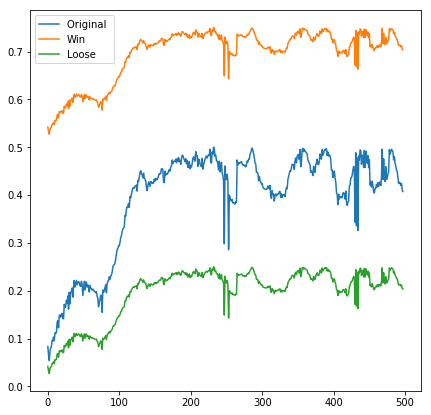

In [19]:
plt.plot([F_reward[i] for i in range(len(F_reward))]) # Original 
plt.plot([(F_reward[i]+1)/2 for i in range(len(F_reward))]) # Win 
plt.plot([(F_reward[i])/2 for i in range(len(F_reward))]) # Loose

plt.legend(('Original ', 'Win', 'Loose'))

# Other options 
Giving more weight to initial stages is equivalent to implementing the discount factor

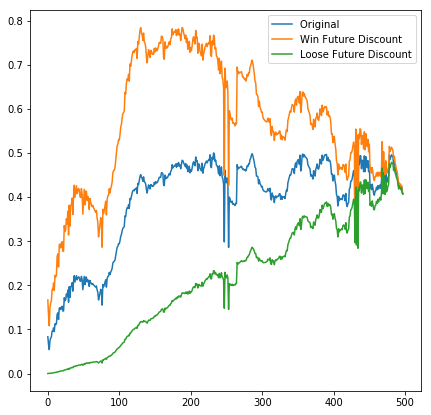

In [20]:
plt.plot([F_reward[i] for i in range(len(F_reward))]) # Original  
plt.plot([(((len(F_reward)-i)/len(F_reward))+1)*(F_reward[i]) for i in range(len(F_reward))]) # Win
plt.plot([(((i)/len(F_reward)))*(F_reward[i]) for i in range(len(F_reward))]) # Loose

plt.legend(('Original ', 'Win Future Discount', 'Loose Future Discount'))

In [ ]:
df_game=pd.DataFrame(F_next_state)

In [ ]:
# Limitations

In [ ]:
#Number of actions different from right 
sum(df_game[11]<1)